#<a name='1'></a>
<div dir='rtl'>
<h1>1. تعریف حدی احتمال (Probability Definition)</h1>
</div>

<div dir='rtl'>
طبق تعریف حدی احتمال:
$$
P(A) = \lim_{n \to +\infty} \frac{n_A}{n}
$$
قصد داریم صحت این رابطه را بصورت عملی بررسی کنیم.
این سنجش فقط به صورت شهودی بوده و موضوعیتی را اثبات نمی‌کند (قابل اتکا نیست)؛
اما هدف انجام آزمایش‌های آماری با استفاده از زبان
R
است که این مسئله ما را به این مقصود خواهد رساند.
</div>

<div dir='rtl'>
این مثال از Lecture 1 را در نظر بگیرید:
<br/>
مثال: دو تاس را می‌اندازیم و می‌خواهیم احتمال این را حساب کنیم که مجموع حاصل ۷ شود. 
</div>

<div dir='rtl'>
می‌دانیم که هر تاس ۶ وجه دارد و طبق اصل ضرب، تعداد پیش‌آمد‌های ممکن برای پرتاب دو تاس، برابر $6 \times 6 = 36$ خواهد بود.
پیش‌آمد‌های مطلوب ما آن‌هایی خواهند بود که شاهد
$(x,y)$
باشیم به طوری که
$x+y=7$.
بنابراین مجموعه پیش‌آمد‌های مطلوب ما عبارت خواهد بود از:
$$\{(1,6),(2,5),(3,4),(4,3),(5,2),(6,1)\}$$
با فرض عادلانه بودن آزمایش و سالم بودن تاس‌ها، احتمالات رو آمدن هر یک از وجوه یک تاس، متساوی‌الاحتمال هستند. بنابراین، احتمالات مشاهده هر یک از زوج مرت‌های ممکن برای تاس‌ها نیز متساوی‌الاحتمال هستند، پس می‌توانیم از تعریف کلاسیک احتمال استفاده کرده و نتیجه بگیریم که احتمال مشاهده نتیجه مطلوب ما برابر
$\frac{6}{36} = 0.1667$
خواهد بود.
</div>

<div dir='rtl'>
حال به تخمین این احتمال، با استفاده از تعریف حدی احتمال می‌پردازیم. در ابتدا نیاز داریم فضای پیشامد این مثال را آماده کنیم:
</div>

In [1]:
dice_possible_observations = seq(1, 6)
# The above variable represents all possible observations for one dice value.
# `seq(x,y)` returns an array from x to y by step = 1 as you can see in the
# result.
dice_possible_observations

[1] 1 2 3 4 5 6

In [2]:
dice_observation_chance_to_appear = rep(1/6, 6)
# `rep(x,y)` returns an array with length = y, full of x values.
# We will use i-th element of this array as the i-th possible observation
# chance to appear.
dice_observation_chance_to_appear

[1] 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667

<div dir='rtl'>
روش نمونه‌گیری، فرآیندی است که به کمک آن زیرمجموعه‌ای از جامعه آماری تهیه می‌شود. این کار به منظور شناخت یا برآورد پارامترهای جامعه آماری صورت می‌گیرد. برای انجام نمونه‌گیری در R، از دستور sample استفاده می‌کنیم.
</div>

In [3]:
sample(
  x = dice_possible_observations,
  size = 1,
  replace = TRUE, 
  prob = dice_observation_chance_to_appear
)

# This function returns an array with length = size, containing fair samples
# from input array "x". It'll use "prob" input as sampling distribution.
# `replace = True` shows that it can repeat an observation in output.
# What we wrote above, will return a single output as a dice observation.
# See the result. Rerun it multiple times to get different results.

[1] 5

In [4]:
# You can see how to define a function which samples n dice.
sample_of_n_dice <- function(n) {
  return (
    sample(
      x = dice_possible_observations,
      size = n,
      replace = TRUE, 
      prob = dice_observation_chance_to_appear
    )
  )
}

sample_of_n_dice(3)

[1] 3 3 5

In [5]:
# The below function calculates sum of dice.
sum_of_n_dice <- function(n) {
  return (
    sum(sample_of_n_dice(n))
  )
}
# The `sum` function takes an input array and returns the sum of its elements.
# See the result. Rerun it multiple times to get different results.
sum_of_n_dice(2)

[1] 11

<div dir='rtl'>
حال در دو بلوک بعدی فرآیند آزمایش را شبیه‌سازی می‌کنیم.
</div>

In [6]:
# Now we need to repeat the test and store observations.
rownames = seq(2, 12)
colnames = "n"
# We need to record our observation so we create a matrix. It contains the 
# number of observations for each possible observation.
# We will increment "n" for i-th row when the i-th observation happens. 
observations <- matrix(
  0,
  nrow = 11,
  byrow = TRUE,
  dimnames = list(rownames, colnames)
)
# Now see the result.
observations

,n
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0


In [7]:
# At the beginning of each experiment, we need to reset parameters.
observations[, "n"] = 0
# This loop will repeat the body, 10000 times with i = 1->1000.
for(i in 1:100000) {

  sum <- sum_of_n_dice(2)
  
  observations[sum-1][1] = observations[sum-1][1] + 1
  
  # In each step, we will increment "n" for row = the observation.
  # Pay attention to the indexing. `observations[x, y]` addresses the value of
  # row = x and column = y.
}
# See the observation. Change number of repeats and try again.
observations

,n
2,2750
3,5544
4,8126
5,11056
6,13868
7,16790
8,13947
9,11110
10,8411
11,5583


In [8]:
# Now we need to calculate the probability of observation "7" based on 
# `observations`. It's so easy:
result = observations["7", "n"] / sum(observations[, "n"])
result

[1] 0.1679

In [9]:
# Now we need to repeat the test and store observations.
rownames = seq(2, 12)
colnames = "n"
# We need to record our observation so we create a matrix. It contains the 
# number of observations for each possible observation.
# We will increment "n" for i-th row when the i-th observation happens. 
observations <- matrix(
  0,
  nrow = 11,
  byrow = TRUE,
  dimnames = list(rownames, colnames)
)

In [10]:
# At the beginning of each experiment, we need to reset parameters.
observations[, "n"] = 0
# This loop will repeat the body, 10000 times with i = 1->1000.
for(i in 1:1000) {

  sum <- sum_of_n_dice(2)
  
  observations[sum-1][1] = observations[sum-1][1] + 1
  
  # In each step, we will increment "n" for row = the observation.
  # Pay attention to the indexing. `observations[x, y]` addresses the value of
  # row = x and column = y.
}

In [11]:
# Now we need to calculate the probability of observation "7" based on 
# `observations`. It's so easy:
result = observations["7", "n"] / sum(observations[, "n"])
result

[1] 0.162

In [12]:
# Now we need to repeat the test and store observations.
rownames = seq(2, 12)
colnames = "n"
# We need to record our observation so we create a matrix. It contains the 
# number of observations for each possible observation.
# We will increment "n" for i-th row when the i-th observation happens. 
observations <- matrix(
  0,
  nrow = 11,
  byrow = TRUE,
  dimnames = list(rownames, colnames)
)

In [13]:
# At the beginning of each experiment, we need to reset parameters.
observations[, "n"] = 0
# This loop will repeat the body, 10000 times with i = 1->1000.
for(i in 1:100) {

  sum <- sum_of_n_dice(2)
  
  observations[sum-1][1] = observations[sum-1][1] + 1
  
  # In each step, we will increment "n" for row = the observation.
  # Pay attention to the indexing. `observations[x, y]` addresses the value of
  # row = x and column = y.
}

In [14]:
# Now we need to calculate the probability of observation "7" based on 
# `observations`. It's so easy:
result = observations["7", "n"] / sum(observations[, "n"])
result

[1] 0.18

<div dir='rtl'>
حلقه‌ی اصلی آزمایش را با تعداد تکرار ۱۰۰ و ۱۰۰۰۰۰، برای هر کدام ۳ بار تکرار و مشاهدات خود را مکتوب کنید. این مشاهدات را تحلیل کنید.
در این تحلیل، علاوه بر آنچه صلاح می‌دانید، موارد زیر نیز باید بررسی کنید:
<br/>
<li>
با توجه به مقدار واقعی احتمال که در ابتدای این بخش، آن را به صورت تئوری 
محاسبه کردیم، میزان دقت این آزمایش را با تعداد نمونه ۱۰۰ در برابر تعداد نمونه ۱۰۰۰۰۰ مقایسه شود. دلیل این اختلاف اهمیت دارد.
</li>
<li>
نتایج سه بار تکرار، برای کدام حالت
(۱۰۰ بار تکرار یا ۱۰۰۰۰۰ بار تکرار)
به هم نزدیک‌تراند؟
</li>
</li>
<br/>
برای 100 بار تکرار: 0.16 و 0.21 و 0.18
<br/>
برای 1000 بار تکرار: 0.175 و 0.177 و 0.16
<br/>
برای 100000 بار تکرار: 0.16754 و 0.16758 و 0.16546
<br/>
<br/>
همانطور که از نتایج مشخص است، هرچه تعداد تکرار ازمایش بالاتر رود، نتایج حاصل به نتیجه مورد انتظار به دست امده از تئوری نزدیکتر میشوند. میانگین خطا برای 100 بار تکرار حدود 13 درصد، برای 1000 بار تکرار حدود 5 درصد و برای 100000 بار تکرار در حدود 0.5 درصد است که بسیار مقدار دقیقتریست.

همچنین هرچه تعداد ازمایش‌ ها بیشتر میشود، نتایج به دست امده به هم نزدیکتر میشوند و فاصله بین نتایج کمتر میشود و برای 100000 بار تکرار نتایج بدست امده کمترین فاصله از هم دیگر را دارند.
</li>
</div>

<div dir='rtl'>
<font color='red'  background-color: blue>
توجه) در کد‌های ارائه شده در این بخش، از حلقه for استفاده شده است. باید دقت کنید که به صورت کلی استفاده از حلقه مطلوب نبوده و باید از آن پرهیز شود. در این بخش با هدف آشنایی با زبان R این نکته نادیده گرفته شده است اما از بخش بعد، از استفاده‌‌ی از این حلقه تا جای ممکن پرهیز می‌شود.
دلیل این پرهیز آن است که محاسبات آماری و نظیر آن، امکان انجام شدن به صورت ماتریسی و موازی در زبان R (و پایتون) را دارند اما زمانی که از حلقه استفاده شود، این مزیت از دست می‌رود و درنتیجه زمان اجرای برنامه‌ها بسیار زیاد می‌شود. روش‌های جایگزینی که جلوتر با آن‌ها آشنا خواهید شد، استفاده از دیتا‌فریم‌ها و ماتریس‌ها و عملگر‌های مختص به آن‌هاست. استفاده از حلقه‌ها باید فقط زمانی صورت بگیرد که شبیه‌سازی مورد نظر واقعا به زمان وابسته باشد و محاسبات هر گام، به گام قبل نیاز داشته باشد.
</font>
</div>

<div dir='rtl'>
<font color='green'>
<h3><font color='green'>اگر مشتاق مشاهده بیشتر هستید، ادامه دهید:</font></h3>
قصد داریم نمودار آزمایش بالا را گام به گام رسم کنیم تا همگرایی نتیجه آزمایش را به مقدار واقعی به مرور زمان (با زیاد شدن تعداد نمونه‌ها) مشاهده کنیم.
کد‌های این قسمت توضیح داده نخواهند شد.
</font>
</div>

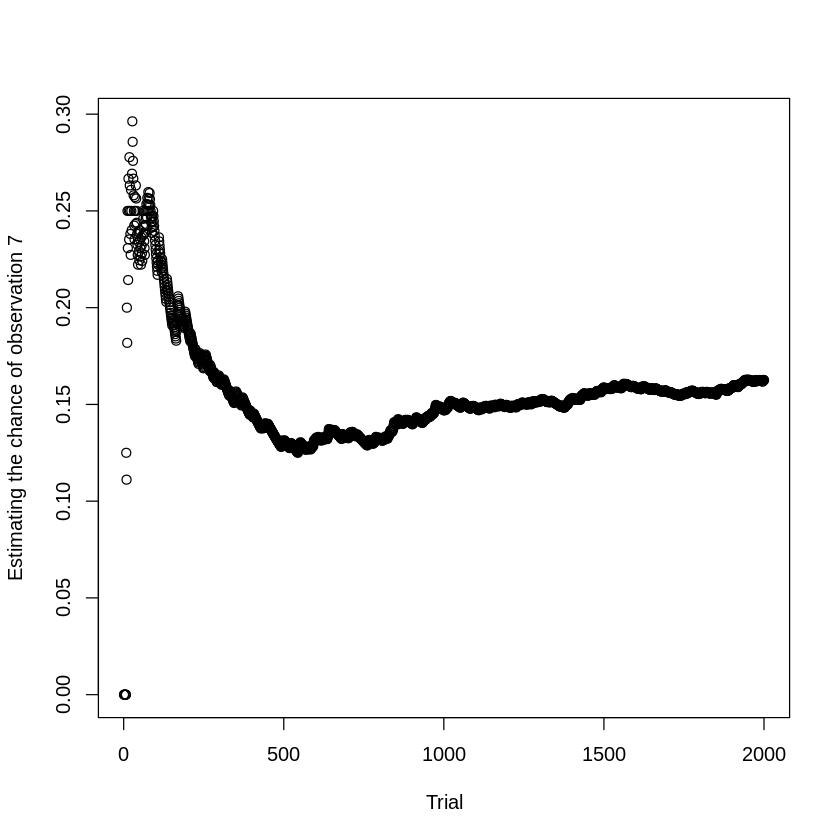

In [15]:
observations[,"n"] = 0
resutls = c()
for(i in 1:2000) {
  obs = sum_of_n_dice(2)
  observations[toString(obs), 'n'] = observations[toString(obs), 'n'] + 1
  result = observations["7", "n"] / sum(observations[, "n"])
  resutls = c(resutls,result)
}
plot(resutls, xlab = "Trial", ylab = "Estimating the chance of observation 7")

<div dir='rtl'>
<font color='green'  background-color: blue>
برای واضح‌تر دیدن همگرایی، همچنین مشاهده اختلاف مسیر‌های همگرایی در تلاش‌های متفاوت، می‌توانیم آزمایش بالا را چندین بار تکرار کنیم و نمودار‌ها را کنار هم قرار دهیم.
</font>
</div>

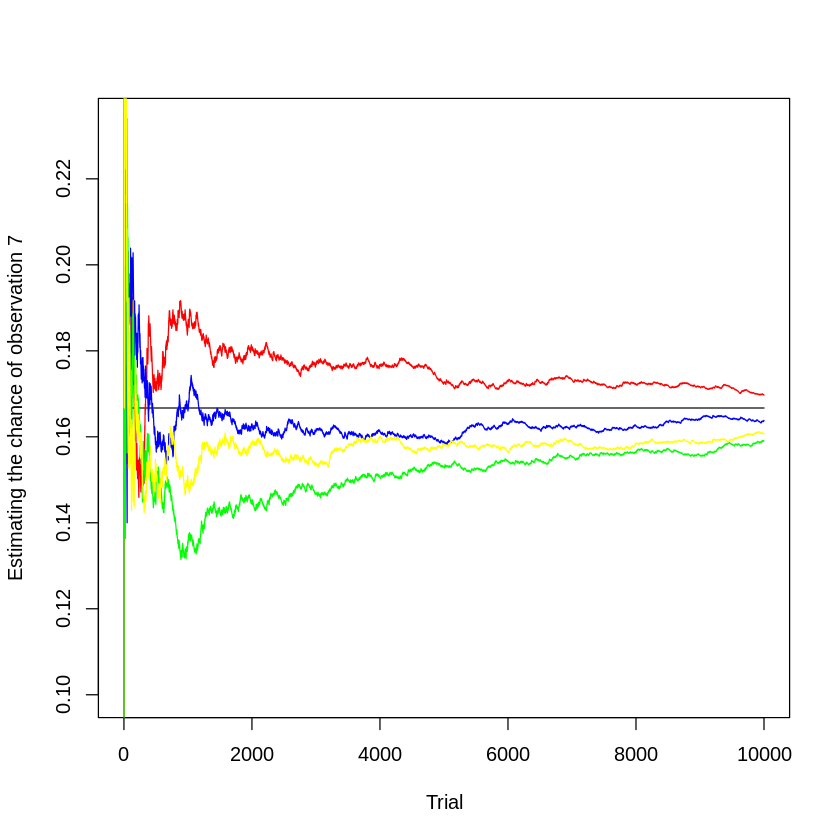

In [16]:
times = 10000
colors = c('red', 'blue', 'green', 'yellow')
plot(rep(0.1667, times), xlab = "Trial", type = "l",
    ylab = "Estimating the chance of observation 7", col = 'black')
for(k in 1:4) {
  observations[, "n"] = 0
  resutls = c()
  for(i in 1:times) {
    obs = sum_of_n_dice(2)
    observations[toString(obs), 'n'] = observations[toString(obs), 'n'] + 1
    result = observations["7", "n"] / sum(observations[, "n"])
    resutls = c(resutls, result)
  }
  lines(resutls, col = colors[k])
}